In [1]:
#Imports
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
'''Loading the data of 70,000 handwritten black & white digits. The images are of resolution 28*28 and are unrolled into a vector of length 784.'''
data = loadmat('mnist-original.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jan  7 15:04:05 2018',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [3]:
'''X is a dataframe of shape (70000, 784)
   Y is a dataframe of shape (70000, 1)'''
X = pd.DataFrame(data['data'].T)
y = pd.DataFrame(data['label'].T)
X.shape

(70000, 784)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #Splitting the data 3:1

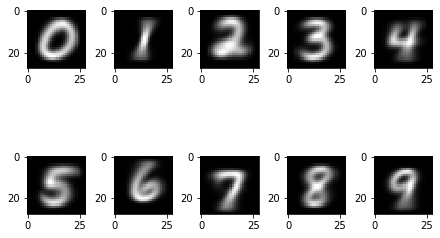

In [5]:
'''Averaging the columns values for all digits separately and printing the average picture of every digit'''
fig1, f1_axes = plt.subplots(ncols=5, nrows=2, constrained_layout=True)
for x in range(10):
    digit = (X_train[y_train[0] == x]).mean(axis = 0).to_numpy().reshape(28,28)
    f1_axes[x//5, x%5].imshow(digit, cmap='gray')

## Logistic Regression

In [6]:
'''Training the Logistic Regression model'''
logclf = LogisticRegression()
logclf.fit(X_train, y_train)

C:\Users\iamsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iamsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iamsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\iamsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
'''Scoring the model on test dataset'''
train_score = logclf.score(X_train, y_train)
test_score = logclf.score(X_test, y_test)
(train_score, test_score) # (0.9334476190476191, 0.9157142857142857)

(0.9334285714285714, 0.9165714285714286)

In [9]:
'''Interactive slider to choose input from the dataset and print the predictions with probability'''
@interact (digit = (0, 17500))
def show_image(digit):
    plt.imshow((X_test.iloc[digit]).to_numpy().reshape(28,28), cmap = 'gray')
    prediction_prob = logclf.predict_proba(X_test.iloc[digit].to_numpy().reshape(1,-1))
    print('Prediction: ' + str(prediction_prob.argmax()) + ', Probability: ' + str(np.max(prediction_prob)))

interactive(children=(IntSlider(value=8750, description='digit', max=17500), Output()), _dom_classes=('widget-…

Prediction: 9, Probability: 0.9759785498604681


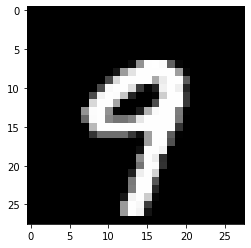

In [11]:
# printing an example prediction as the interactive slider does not work on published notebooks
show_image(1500)

END